#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'

- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [3]:
#1-Basic Data Exploration
num_rows = df.shape[0]
num_columns = df.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)
data_types = df.dtypes
print("Data types:")
print(data_types)
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

Number of rows: 148654
Number of columns: 13
Data types:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
Missing values:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [4]:
#2-Descriptive Statistics
# Calculate mean salary
mean_salary = df['TotalPay'].mean()
print("Mean salary:", mean_salary)

# Calculate median salary
median_salary = df['TotalPay'].median()
print("Median salary:", median_salary)

# Calculate mode of salary
mode_salary = df['TotalPay'].mode()
print("Mode salary:", mode_salary)

# Calculate minimum and maximum salary
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
print("the Minimum salary:", min_salary)
print("Maximum salary:", max_salary)

# Calculate range of salaries

print("Salary range:", max_salary - min_salary)

# Calculate standard deviation of salary
print("Standard deviation of salary:", df['TotalPay'].std())

Mean salary: 74768.32197169267
Median salary: 71426.60999999999
Mode salary: 0    0.0
Name: TotalPay, dtype: float64
Minimum salary: -618.13
Maximum salary: 567595.43
Salary range: 568213.56
Standard deviation of salary: 50517.005273949944


In [5]:
#3-Data Cleaning
# Print all values in the selected row
row_values = df["Status"].values
print("Row values:")
print(row_values)



row_values1 = df["Notes"].values
print("Row values:")
print(row_values1)

Row values:
[nan nan nan ... nan nan nan]
Row values:
[nan nan nan ... nan nan nan]


In [6]:
df = df.drop('Status', axis=1)
df = df.drop("Notes", axis=1)


In [7]:
num_rows = df.shape[0]
num_columns = df.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 148654
Number of columns: 11


In [34]:
df["Benefits"].fillna(0, inplace=True)
row_values2 = df["Benefits"].values
print("Row values:")
print(row_values2)

Row values:
[0. 0. 0. ... 0. 0. 0.]


In [33]:
# Calculate the filling value by subtracting the specified columns
fill_value = df['TotalPay'] - df['Benefits']

# Update the zero values in the specified column with the fill value
df.loc[df['BasePay'] == 0, 'BasePay'] = fill_value


30


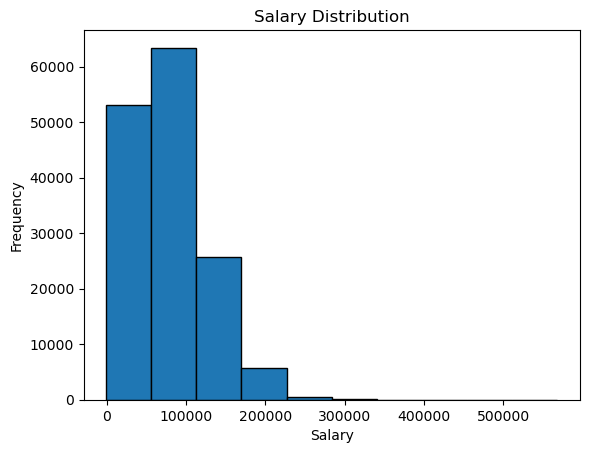

In [10]:
# Create a histogram or bar chart for salary distribution
plt.hist(df['TotalPay'], bins=10, edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

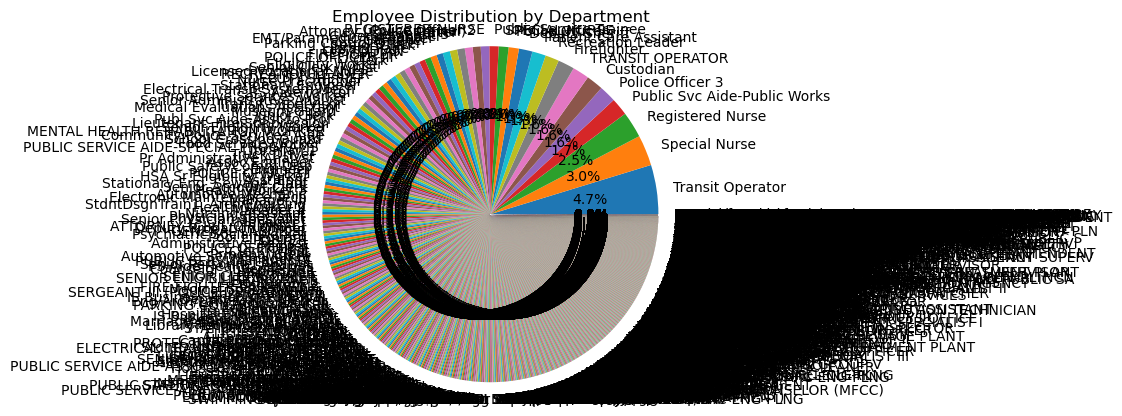

In [11]:
# Calculate the proportion of employees in each department
department_counts = df['JobTitle'].value_counts()

# Create a pie chart for department proportions
plt.pie(department_counts, labels=department_counts.index, autopct='%3.1f%%')
plt.title('Employee Distribution by Department')
plt.axis('equal')
plt.show()

In [35]:
#5-Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group,
#and compare the average salaries across different groups.

# Group the data by one or more columns and calculate summary statistics
grouped_df = df.groupby(['JobTitle', 'Year']).agg({'TotalPay': 'mean', 'BasePay': 'mean'})

# Compare the average salaries across different groups
average_salary_comparison = grouped_df.pivot_table(index='JobTitle', columns='Year', values='TotalPay')

# Print the average salary comparison
print(average_salary_comparison)

Year                                                    2011          2012  \
JobTitle                                                                     
ACCOUNT CLERK                                   44035.664337           NaN   
ACCOUNTANT                                      47429.268000           NaN   
ACCOUNTANT INTERN                               29031.742917           NaN   
ACPO,JuvP, Juv Prob (SFERS)                              NaN           NaN   
ACUPUNCTURIST                                   67594.400000           NaN   
...                                                      ...           ...   
X-RAY LABORATORY AIDE                           52705.880385           NaN   
X-Ray Laboratory Aide                                    NaN  53492.062258   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  53632.870000           NaN   
Youth Comm Advisor                                       NaN  57544.730000   
ZOO CURATOR                                     66686.560000    

0.032090397985590415


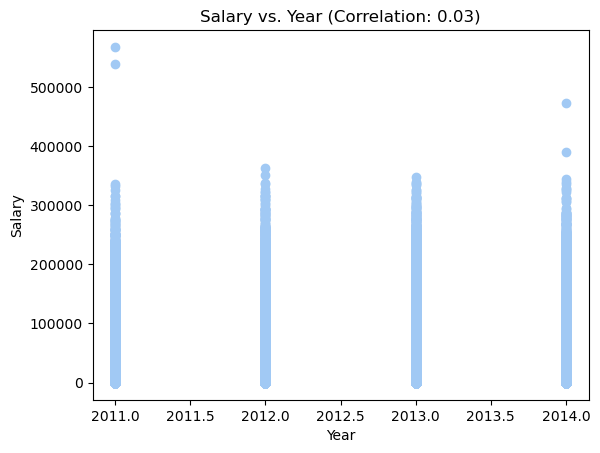

In [36]:
#6-
salary_column = 'TotalPay'
year_column = 'Year'

# Calculate the correlation between salary and Year
correlation = df[salary_column].corr(df[year_column])
print(correlation)
# Create a scatter plot to visualize the relationship
plt.scatter(df[year_column], df[salary_column])
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title(f'Salary vs. Year (Correlation: {correlation:.2f})')
plt.show()

# Good Luck!